In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import xarray as xr

from pathlib import Path

HERE = Path().cwd()
BAPSF_MOTION = (HERE / ".." / ".." / ".." / "src").resolve()
sys.path.append(str(BAPSF_MOTION))

plt.rcParams.update(
    {
        # "figure.figsize": [12, 0.56 * 12],
        "figure.figsize": [10, 0.8 * 10],
        "font.size": 16,
    }
)

In [2]:
from bapsf_motion.motion_list.exclusions import CircularExclusion, DividerExclusion

## Create LaPD XY exclusion mask using elementry exclusions

Create the seeding boolean mask.  In the boolean mask a `True` value indicates a point allowed for a motion list and a `False` value indicaes an exclusion zone.

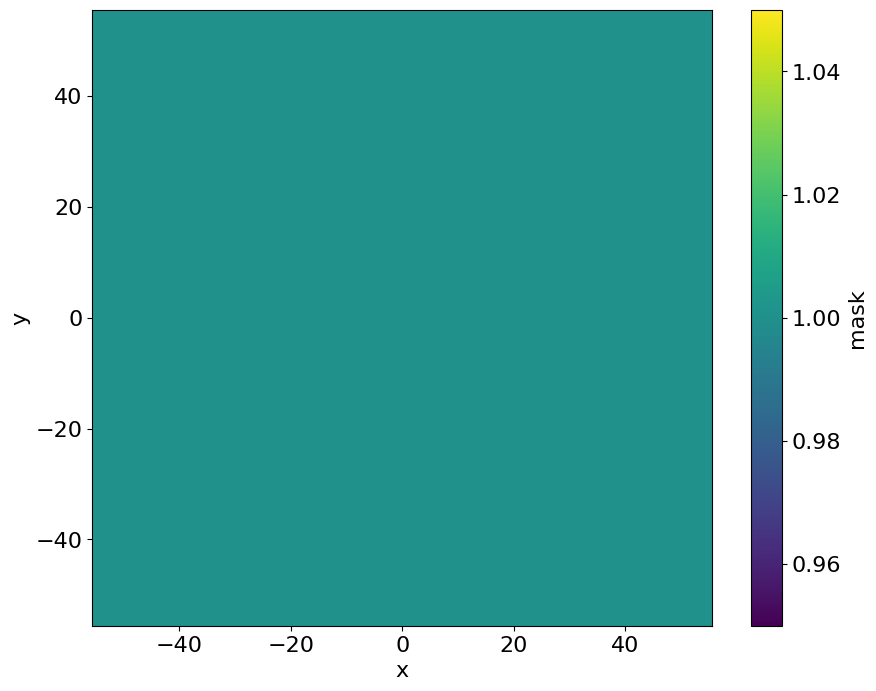

In [3]:
size = 100
side = np.linspace(-55, 55, num=size)
ds = xr.Dataset(
    {"mask": (("x", "y"), np.ones((size, size), dtype=bool))},
    coords={
        "x": side,
        "y": side,
    },
)

ds.mask.plot(x="x", y="y");

Add a circular XY exclusion that simulates the LaPD inner diameter

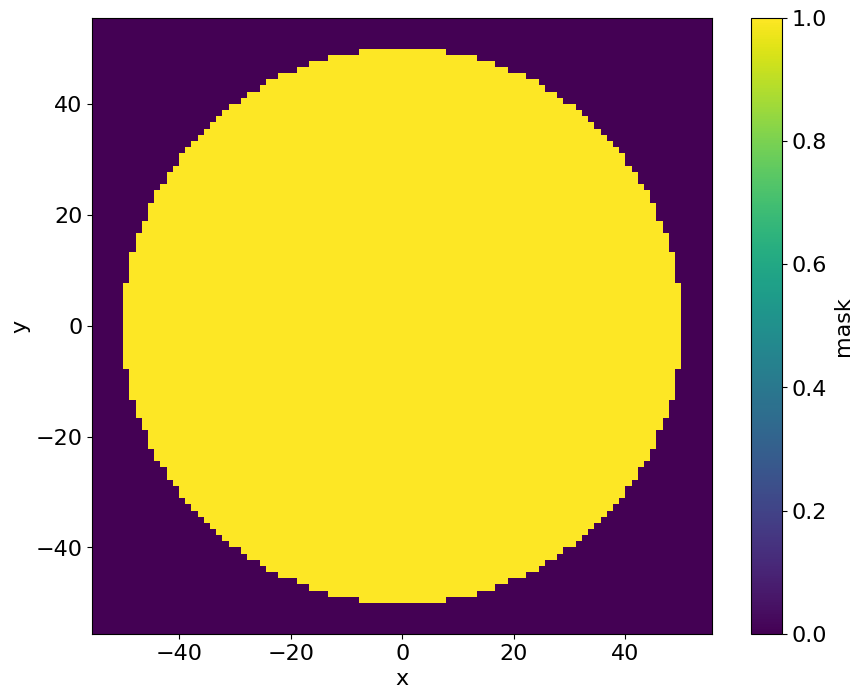

In [4]:
ex1 = CircularExclusion(ds, radius=50)
ds["mask"].plot(x="x", y="y");

Let's add boundaries representing the exclusion cone from the East port.

True


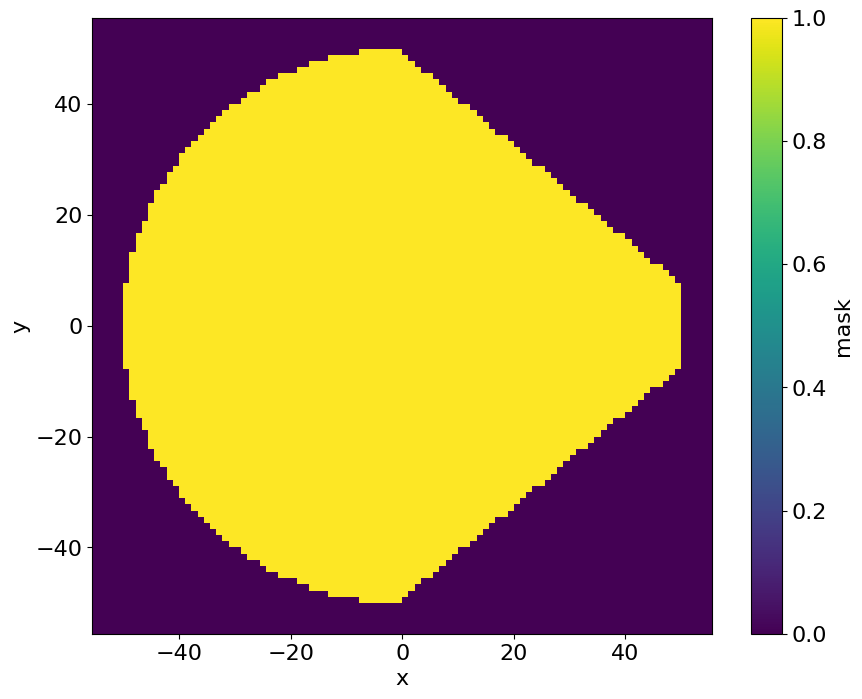

In [5]:
x_pivot = 58.771
cone_half_angle = 40  # degrees

intercept = np.abs(x_pivot) * np.tan(np.radians(cone_half_angle))
slope = intercept / np.abs(x_pivot)

print(isinstance(intercept, float))

ex2 = DividerExclusion(
    ds,
    mb=(-slope, intercept),
    exclude="+e1",
)
ex3 = DividerExclusion(
    ds,
    mb=(slope, -intercept),
    exclude="-e1",
)
ds["mask"].plot(x="x", y="y");

In [6]:
ds

<xarray.Dataset>
Dimensions:   (x: 100, y: 100)
Coordinates:
  * x         (x) float64 -55.0 -53.89 -52.78 -51.67 ... 51.67 52.78 53.89 55.0
  * y         (y) float64 -55.0 -53.89 -52.78 -51.67 ... 51.67 52.78 53.89 55.0
Data variables:
    mask      (x, y) bool False False False False ... False False False False
    mask_ex1  (x, y) bool False False False False ... False False False False
    mask_ex2  (y, x) bool True True True True True ... False False False False
    mask_ex3  (y, x) bool True True True True True ... True True True True True

## Generate a LaPD mask using LaPDExclusion

In [7]:
from bapsf_motion.motion_list.exclusions import LaPDExclusion

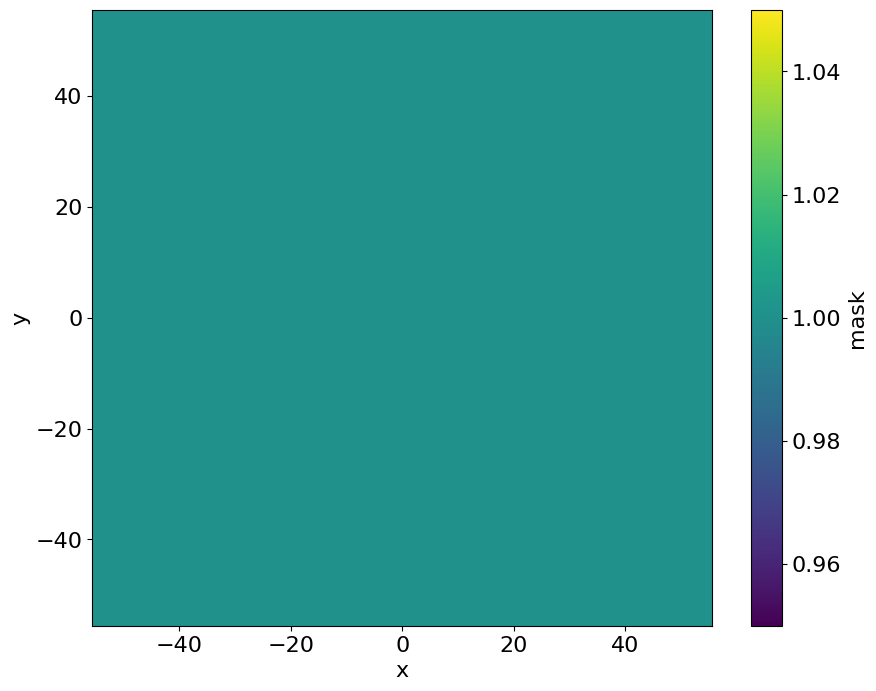

In [8]:
size = 100
side = np.linspace(-55, 55, num=size)
ds = xr.Dataset(
    {"mask": (("x", "y"), np.ones((size, size), dtype=bool))},
    coords={
        "x": side,
        "y": side,
    },
)

ds.mask.plot(x="x", y="y");

The default settings for the for `LaPDExclusion` are the same as the manually constructed exclusion mask above.

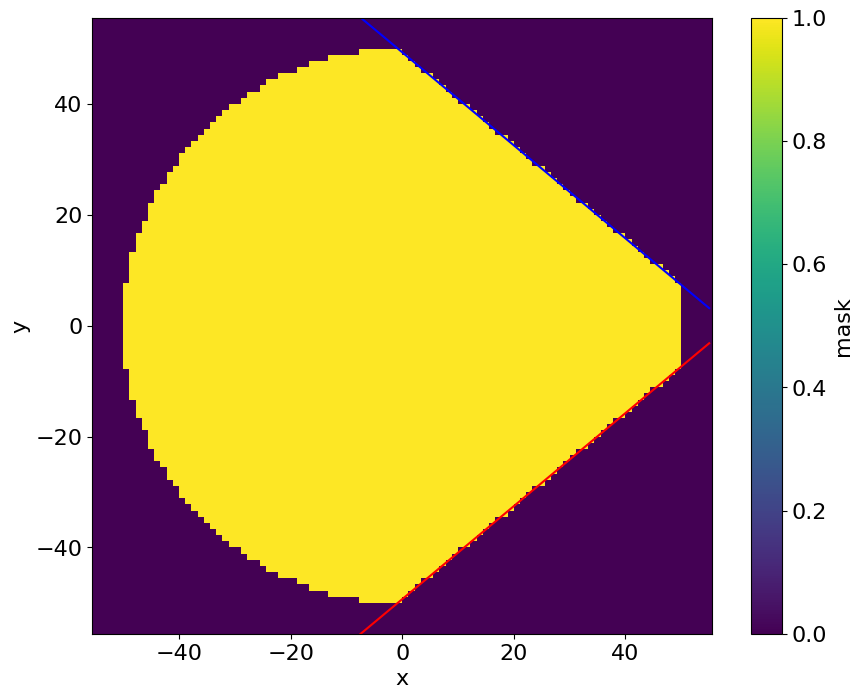

In [9]:
ex = LaPDExclusion(ds)

ds.mask.plot(x="x", y="y")

mb = ex.composed_exclusions[1].mb
plt.plot(side, mb[0] * side + mb[1], color="blue")

mb = ex.composed_exclusions[2].mb
plt.plot(side, mb[0] * side + mb[1], color="red");

Additionally, port locations can be specified using values of `E`, `East`, `W`, `West`, `T`, `Top`, `B`, and `Bottom` (all are case insensitive).

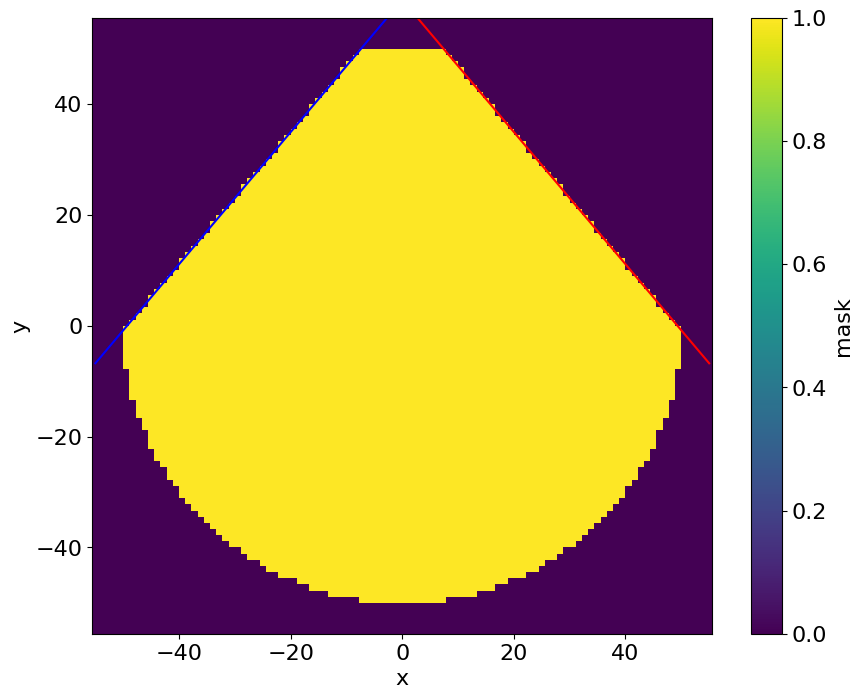

In [10]:
ds = xr.Dataset(
    {"mask": (("x", "y"), np.ones((size, size), dtype=bool))},
    coords={
        "x": side,
        "y": side,
    },
)

ex = LaPDExclusion(ds, port_location="T")

ds.mask.plot(x="x", y="y")

mb = ex.composed_exclusions[1].mb
plt.plot(side, mb[0] * side + mb[1], color="blue")

mb = ex.composed_exclusions[2].mb
plt.plot(side, mb[0] * side + mb[1], color="red");

For non-standard ports an angle (in degrees) can be given instead.

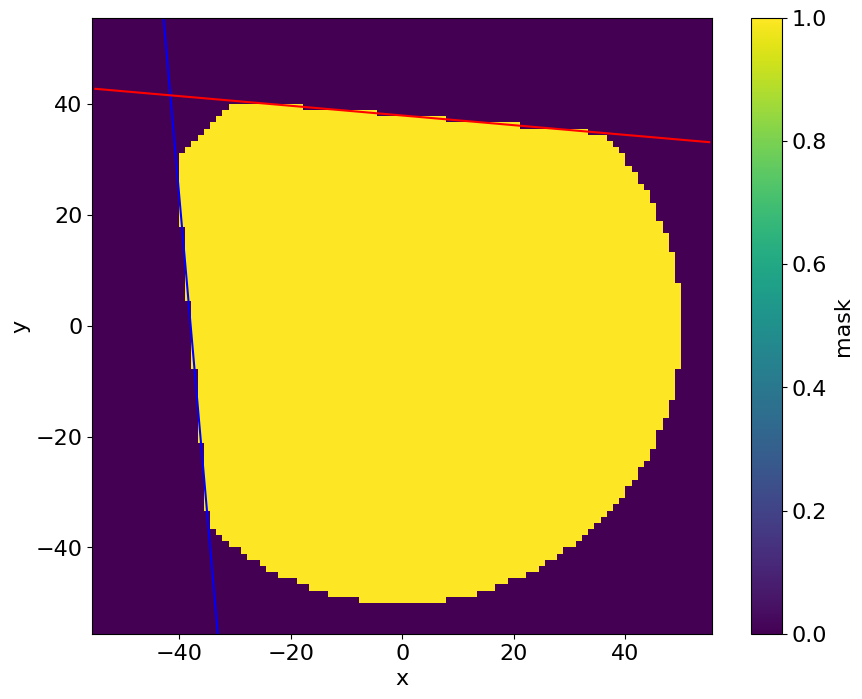

In [11]:
ds = xr.Dataset(
    {"mask": (("x", "y"), np.ones((size, size), dtype=bool))},
    coords={
        "x": side,
        "y": side,
    },
)

ex = LaPDExclusion(ds, port_location=135)

ds.mask.plot(x="x", y="y")

mb = ex.composed_exclusions[1].mb
plt.plot(side, mb[0] * side + mb[1], color="blue")

mb = ex.composed_exclusions[2].mb
plt.plot(side, mb[0] * side + mb[1], color="red");